

# Project: Investigate a Dataset - [FBI Gun data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The primary data comes from the FBI's
National Instant Criminal Background
Check System. The NICS is used to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The secondary data has been
supplemented with state level data
from census.gov contains statistical data concerning the US population per state (population, %white, median houses values,...etc).
* All the Datasets I used in this project are the following:

> 1. The NICS data is found in one
    sheet of an .xlsx file. It contains
    the number of firearm checks by
    month, state, and type.
> 2. The U.S. census data is found
    in a .csv file. It contains several
    variables at the state level. Most
    variables just have one data
    point per state (2016), but a few
    have data for more than one
    year.

> I've also added two other datasets and a Law-restriction score table to help in my analysis which are the following:
 3. Census population data from 2010 to 2019: the data comes in CSV format and contains estimates of the US population per state between the years 2010 and 2019. this data is included to assess the effect of gun-laws restriction on homicides in each state
 Link: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html?fbclid=IwAR3MAQF8o4Dm7o-AIGFda41EPZI3ubdbicguddsKqKqjdSxyQyB0a1CcLg4

 4. US Homicides data: found in Kaggle.com and in the format of CSV also which contains recordings of Homicides incidents in each US state in details. Link: https://www.kaggle.com/datasets/murderaccountability/homicide-reports
 5. Law-restriction score table: this table contains every state ranks (A to F) concerning their gun-restriction Laws, high ranked states mean that they are implementing high restrictive measures concerning gun owenership, I used this table to split the data into two: High ranked states (Classes A and B) and Low ranked states (Classes C,D and F)
 Link: https://worldpopulationreview.com/state-rankings/strictest-gun-laws-by-state?fbclid=IwAR1BcffYW4-c6l91JwUx6G0bAcmqJAK0BPE5-OA8t69ayB9j3w4vJV2D4jM

### Questions for Analysis
**Several Questions will be asked separating the EDA section into 3 segments:**

>**Question no. 1**: What is the overall purchasing trend? What drives the sales up?

>**Question no. 2**: What census data are most associated with gun per capita in each state Class (AB or CDF)?

>**Question no. 3**: What are the highest Class(AB or CDF)/top 10 states in purchasing growth in each state Class ?

>**Question no. 4**: Is there is a correlation between gun purchases and the number of gun-related US homicides? How is gun restriction laws affecting the US homicides?

>**IMPORTANT NOTE**: The FBI Background checks data IS NOT the number of firearms sold. Based on varying state laws and purchase scenarios, a permit or a purchase background doesn't mean the purchaser would be able to purchase always But It can be considered as a good a metric to view the gun permits and purchases activities meaning that we're assuming that the more permits to possess a firearm and firearm purchases requests (hence, background checks) the more there's an indication of more firearm purchases and a purchasing trend.

In [1]:
# importing statements for all of the packages that I'm planning to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
plt.style.use('Solarize_Light2')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading the datasets 

*1. Importing the FBI Background checks data*

In [2]:
# setting the display columns to view all columns in all datasets
pd.options.display.max_columns=None
#importing the FBI gun data
gun_data=pd.read_excel('gun-data.xlsx')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
# Checking no. columns, rows, non-null values and datatypes
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

*2. Importing the Census data*

In [4]:
#importing and exploring the Census data 
census_data=pd.read_csv('u.s.-census-data.csv')
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
# Checking no. columns, rows, non-null values and datatypes
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [6]:
# checking the bottom rows in this dataset as clearly the states rows are only 65 rows not 85 as the fact column
census_data.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*3. Importing the population data estimates from 2010 to 2019*

In [7]:
#importing and exploring the Census data 
population_data=pd.read_excel('nst-est2019-01.xlsx', skiprows=3)
population_data.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55317240.0,55318443.0,55380134.0,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66927001.0,66929725.0,66974416.0,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114555744.0,114563030.0,114866680.0,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,71945553.0,71946907.0,72100436.0,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0


In [8]:
# Checking no. columns, rows, non-null values and datatypes
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62 non-null     object 
 1   Census          57 non-null     float64
 2   Estimates Base  57 non-null     float64
 3   2010            57 non-null     float64
 4   2011            57 non-null     float64
 5   2012            57 non-null     float64
 6   2013            57 non-null     float64
 7   2014            57 non-null     float64
 8   2015            57 non-null     float64
 9   2016            57 non-null     float64
 10  2017            57 non-null     float64
 11  2018            57 non-null     float64
 12  2019            57 non-null     float64
dtypes: float64(12), object(1)
memory usage: 6.5+ KB


*4. Importing the US homicides data from 1980 to 2014*

In [9]:
#importing and exploring the Census data 
us_homicides=pd.read_csv('us_homicides.csv', low_memory=False)
us_homicides.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [10]:
# Checking no. columns, rows, non-null values and datatypes
us_homicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

*5. Importing the gun-laws restrictions rank for every state table*

In [11]:
#The Law data is imported from an article found in worldpopulationreview.com
law_data = pd.read_html('https://worldpopulationreview.com/state-rankings/strictest-gun-laws-by-state?fbclid=IwAR1BcffYW4-c6l91JwUx6G0bAcmqJAK0BPE5-OA8t69ayB9j3w4vJV2D4jM')
law_data

[             State  Gun Law Ranking 2019 Strictness Grade  Gun Death Rate
 0       California                1                     A            7.45
 1       New Jersey                2                     A            4.75
 2      Connecticut                3                    A-            4.91
 3         New York                4                    A-            4.03
 4           Hawaii                5                    A-            4.03
 5         Maryland                6                    A-           11.61
 6    Massachusetts                7                    A-            3.46
 7         Illinois                8                    A-           10.78
 8     Rhode Island                9                    B+            3.28
 9       Washington               10                    B+           10.32
 10        Delaware               11                     B           11.55
 11    Pennsylvania               12                    C+           12.47
 12       Minnesota      

In [12]:
# imported table seems to be a list, this needs to be verified.
type(law_data)

list


### Data Cleaning
* Main Objective in this Section is to do the following:
1. Clean The FBI dataset
2. Clean the Census data
3. Clean the population data
4. Clean The homicide data
5. Clean and prepare the gun-laws restiction score table
6. Creating a growth table with totals and monthly growth calculated per state 
7. Merging the FBI dataset with The Census dataset
8. Merging the FBI dataset with the US Homicides dataset
 

> 1. Cleaning the FBI data

The FBI background checks data cleaning process will proceed in the following order:
1. Converting the 'month' column into a datetime64 type as it represent dates
2. We'll extract the year from the month column into another column that would be named 'year' so we can later groupby year
3. We'll extract the month from the month column into another column that would be named 'month_number'so we can later groupby month
4. All other columns seem to have the right datatype and need no further cleaning
5. we won't fill the null values in permits, permits recheck, other,...etc. as they would effect the 'totals' column (filling these columns with average values would require adjusting the totals count and this would not be accurate as the columns are null because they're representing no value (Zero)) and we're only interested in the totals column and we'll no be using any other columns for background checks.

In [13]:
# Converting the 'month' column into a datetime64 type
gun_data['month']=pd.to_datetime(gun_data['month'])

In [14]:
# extracting the year and month from the month column into anthor columns that would be named 'year'/'month_number'
gun_data['year'] = gun_data['month'].apply(lambda x: x.year)
gun_data['month_number'] = gun_data['month'].apply(lambda x: x.month)

In [15]:
# Checking no. columns, rows, non-null values and datatypes
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

1. column 'month' type successfully converted to datetime64
2. columns 'year' and 'month_number' successfully created

In [16]:
gun_data.sample(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,month_number
1002,2016-03-01,Hawaii,1468.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1469,2016,3
4778,2010-07-01,Vermont,0.0,NaN,680.0,800.0,22.0,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1523,2010,7


> 2. Cleaning the Census data

This dataset have alot of problems that needs to be addressed before we begin our analysis, these problems can be summerized as follows:
1. the table need to be transposed to have a column of the states and columns for each variable for later merge with the FBI data
2. the tail rows of the dataset are just notes for values not present for alot of different reasons:
> a. D:	Suppressed to avoid disclosure of confidential information 
<br>b. F:	Fewer than 25 firms
<br>c. FN:	Footnote on this item in place of data
<br>d. NA:	Not available
<br>e. S:	Suppressed; does not meet publication standards
<br>f. X:	Not applicable
<br>g. Z:	Value greater than zero but less than half unit of measure shown
<br>H. Fact Notes
<br>I. Value Notes
<br>They're the bottom 21 rows (total rows are 85 and non-null data for each state are 65 rows) and needs to be removed as we'll use them in our analysis, the data we're using are the first 65 rows -the census data per each state
3. Every column that present a percent change have some rows with '%' which need cleaning to convert these columns into actual floats not a string, this will enable us perform calculations and plot actual values
4. Some columns that represents values in dollars have '$' which need cleaning to convert these columns into actual floats not a string, this will enable us perform calculations and plot actual values
5. numbers in other columns have ',' to represent thousends which need cleaning to convert these columns into actual floats not a string, this will enable us perform calculations and plot actual values
6. The 'Facts' and 'FIPS code' columns needs to be removed as they represent no actual values that would be used in our analysis.
7. Some columns have the above mentioned notes (F, FN, NA, S, X, Z) and needs to be removed and replaced with null values to be able to convert these column into floats


In [17]:
# transposing the table to have all the states in one column and each other variable in columns
census_data=census_data.transpose()

In [18]:
# removing the notes rows from the datset (21 rows) the remaing 65 rows are our datset that we're interested in.
census_data_cleaned=census_data.iloc[:,:65]
census_data_cleaned.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July...","American Indian and Alaska Native alone, perce...","Asian alone, percent, July 1, 2016, (V2016)",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent, July 1, 2016, (V2...","Hispanic or Latino, percent, July 1, 2016, (V...","White alone, not Hispanic or Latino, percent, ...","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, ...",Median selected monthly owner costs -with a mo...,Median selected monthly owner costs -without a...,"Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of pe...","Language other than English spoken at home, pe...","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...","With a disability, under age 65 years, percent...","Persons without health insurance, under age 6...","In civilian labor force, total, percent of pop...","In civilian labor force, female, percent of po...","Total accommodation and food services sales, 2...",Total health care and social assistance receip...,"Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers ag...","Median household income (in 2015 dollars), 201...",Per capita income in past 12 months (in 2015 d...,"Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(a),(a),(a),(a),(a),NaN,(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(c),(c),(c),(c),(c),(c),NaN,NaN,NaN,NaN,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40

In [19]:
# removing the default columns' names created from 0 to 64
census_data_cleaned.columns=census_data_cleaned.loc['Fact',:]
# removing the Fact Note row to have only our columns true values ready for further cleaning
census_data_cleaned=census_data_cleaned.iloc[2:,:]
census_data_cleaned.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,146","1,503"

In [20]:
# dropping the last column 'FIPS Code' as we'll not be using it.
census_data_cleaned=census_data_cleaned.drop(['FIPS Code'],axis=1)
census_data_cleaned.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,146","1,503","250,969",2.81,80.

In [21]:
# renaming the states column to 'states'
census_data_cleaned.index.rename('state', inplace=True)
census_data_cleaned.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,96

In [22]:
def percent_cleaner(column_number):
    '''This function is created to clean the columns that have the '%' sign, 'Z' or 'FN' notes in it
    the function inputs are a list of columns numbers in the dataset that needs to be cleaned and the  % sign
    in each cell in each columns strings will be removed and divied by 100
    - If the cell contains the Z or FN note it would be replaced with a null value
    then the function returns the first 5 rows of the dataset to confirm the mentioned columns are cleaned '''
    for j in column_number:
        column_list=[]
        for i in range(census_data_cleaned.shape[0]):
        #This nested loop will iterate through each column and each cell in it to replace the % sign and divide by 100
        # or the Z and FN note to replace it with null values
        
            if census_data_cleaned.iloc[:,j][i][-1] == '%':
                x=census_data_cleaned.iloc[:,j][i].strip('%')
                x=round(float(x)/100,3)
                # after each cell is processed it is appended to a list that would be converted into a series
                column_list.append(x)
            elif census_data_cleaned.iloc[:,j][i][-1] == 'Z' or census_data_cleaned.iloc[:,j][i] == 'FN' : 
                x=np.nan 
                column_list.append(x) 
            else: 
                x=float(census_data_cleaned.iloc[:,j][i])
                column_list.append(x)
            
        # converting the acquired list into a Series and replacing the column being iterated with this series        
        series=pd.Series(column_list, dtype='str')
        census_data_cleaned.iloc[:,j]=series.values
    return  census_data_cleaned.head()     
    



In [23]:
# this for loop creates a dictionary with columns names as keys and its number as value
# from this dictionary I'll be able to know each number of the columns I need to insert into the percent cleaner function
cols_dict={}
for i in census_data_cleaned.columns:
    cols_dict[i]=census_data_cleaned.columns.get_loc(i)
cols_dict['Population, Census, April 1, 2010']

3

In [24]:
# We'll be using this dictionary (col_dict) to obatin a column numbers list of all the columns that needs 
# to be insert into the percent_cleaner function.
#  it's noticed that all the columns in question their first cell have '%' sign
#  so we'll using this condition to know if a certain column in loop needs the percent cleaner function
percent_col=[]
for i in census_data_cleaned.columns:
    #iteration through our 65 columns to check if its first cell [0] have a % sign as a last character [-1]
    if census_data_cleaned[i][0][-1]=='%':
        percent_col.append(cols_dict[i])

In [25]:
# finally the columns numbers list obtained will be used as input to the percent_cleaner function
percent_cleaner(percent_col)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,"4,863,300","4,780,131",0.017,"4,779,736",0.06,0.064,0.226,0.237,0.161,0.138,0.516,0.515,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,"363,170",0.035,"2,230,185","2,171,853",0.687,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,0.853,0.052,0.843,0.235,0.118,0.107,0.58,0.53,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",0.171,"98,540","1,634,391","67,370,353",0.019,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",0.045,"710,231",0.073,0.076,0.252,0.264,0.104,0.077,0.477,0.48,0.661,0.038,0.152,0.063,0.013,0.073,0.07,0.612,"69,323",0.074,"310,658","306,967",0.634,"$250,000","$1,827",$5

In [26]:
# replacing the D note that exists only in this column with null values
census_data_cleaned['Total manufacturers shipments, 2012 ($1,000)']=np.where(census_data_cleaned['Total manufacturers shipments, 2012 ($1,000)']=='D',np.nan,census_data_cleaned['Total manufacturers shipments, 2012 ($1,000)'])

In [27]:
#removing the dollar sign from columns that have them and removing the ',' character that represent thousends
# after removing the dollar signs and the ',' character the cell values will be converted to a float64
for i in range(census_data_cleaned.shape[1]):
    #this for loop iterates through each column if it have the dollar sign it would be removed
    # and then the cell type converted to float64, else the cell values will directly be converted into floats
    if census_data_cleaned.iloc[0,i][0]=='$':
        census_data_cleaned.iloc[:,i] = census_data_cleaned.iloc[:,i].str.replace('$','').str.replace(',','').astype('float64')
    else:
        census_data_cleaned.iloc[:,i] = census_data_cleaned.iloc[:,i].str.replace(',','').astype('float64')


<ipython-input-27-a10acf93c4a7>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data_cleaned.iloc[:,i] = census_data_cleaned.iloc[:,i].str.replace('$','').str.replace(',','').astype('float64')


In [28]:
# all values dtypes for the Census dataset should be float64, we'll be checking it now
census_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 64 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 3   Population, Census, April 1, 2010                                                       50 non-null     float64
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     float64
 5   Persons under 5 years, percent, April 1, 2010                      

*Splitting the Census data into 3 useful datasets: 2012, 2016 and 2011-2015 interval*
<br>*Extracting the FBI data for the 3 useful datasets: 2012, 2016 and 2011-2015 interval*
> The Census dataset represents data from 2010, 2012, 2016 and the years interval of 2011-2015, the same parameters for 2010 are found in 2016 parameters so we'll only use 2012,2016 and the 2011-2015 parameters, we'll splits its columns into 3 datasets and use them to find these parameters correlations with their prespective years
> Consequently We'll extract the gun data for the same years or years interval to investigate the correlations later

In [29]:
# Extracting the FBI data for the 3 useful datasets: 2012, 2016 and 2011-2015 interval
gun_data2016=gun_data[gun_data['year']==2016]
gun_data2012=gun_data[gun_data['year']==2012]
gun_datato2015=gun_data[gun_data['year'].isin(range(2011,2016))]

#Extracting the columns that we'll be using for each splitted dataset
# Most of th columns for years 2012, 2016 and 2011-2015 interval are selected
census_datato2015=census_data_cleaned.iloc[:,[20,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,46,47,48,49,50,51,52,53,54]]
census_data2016=census_data_cleaned.iloc[:,[0,4,6,8,10,12,13,14,15,16,17,18,19,22]]
census_data2012=census_data_cleaned.iloc[:,[41,42,43,44,45,55,56,57,58,59,60,61]]
census_data2012.head()

Fact,"Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012"
state,,,,,,,,,,,,
Alabama,26039632.0,124809759.0,57746565.0,58564965.0,12145.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0
Alaska,6375483.0,NaN,5216303.0,10474275.0,14320.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0
Arizona,37055881.0,51243473.0,69437272.0,84716542.0,12927.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0
Arkansas,15792628.0,62712925.0,31256110.0,36815256.0,12483.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0
California,248953592.0,512303164.0,666652186.0,481800461.0,12665.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0


> 3. Population Data Cleaning

The population data imported from Census.gov needs to be prepossed with the following steps:
> 
1. renaming the states column from the default name '0' to 'states'
2. drop any rows with null values
3. dropping the first five rows that contains population data for overall US and regions (West, East,...etc)
4. the 'Census' and 'Estimates Base' columns will be removed as we'll not be using them in our analysis
5. the years needs to be in one column 'year' and population values in another 'population' for future merging and groupby purposes 

In [30]:
#renaming the states column from the default name '0' to 'states'
population_data.rename(columns={'Unnamed: 0':'state'}, inplace=True)
population_data.dropna(axis=0, inplace=True)
# Dropping the first 5 rows that we'll be using in our analysis
population_data.drop([0,1,2,3,4],axis=0, inplace=True)
population_data.reset_index(inplace=True,drop=True)
population_data.head()


,state,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,.Alabama,4779736.0,4780125.0,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
1,.Alaska,710231.0,710249.0,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
2,.Arizona,6392017.0,6392288.0,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
3,.Arkansas,2915918.0,2916031.0,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
4,.California,37253956.0,37254519.0,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [31]:
# I'm actually not sure how the '.' character appeared as it's not visible in the excel file
# but it needs to be removed
population_data['state'] = population_data['state'].apply(lambda x: x.strip('.'))
population_data.drop(['Census','Estimates Base'],axis=1,inplace=True)
population_data.head()

,state,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
1,Alaska,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
2,Arizona,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
3,Arkansas,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
4,California,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [32]:
#we'll be only using population data from 2010 to 2017 hence the i.loc[:,:9] slicing
# we'll make use of the stack function to transform the years and population columns into two columns after indexing the state column
yearly_population= pd.DataFrame(population_data.iloc[:,:9].set_index('state').stack()).reset_index()
yearly_population.tail()

,state,level_1,0
411,Puerto Rico,2013,3593077.0
412,Puerto Rico,2014,3534874.0
413,Puerto Rico,2015,3473232.0
414,Puerto Rico,2016,3406672.0
415,Puerto Rico,2017,3325286.0


In [33]:
# removing the default columns names created for years and population
yearly_population.rename(columns={'level_1':'year',0:'population'}, inplace= True)
yearly_population['year'] = yearly_population['year'].astype('int64')
yearly_population.head()

,state,year,population
0,Alabama,2010,4785437.0
1,Alabama,2011,4799069.0
2,Alabama,2012,4815588.0
3,Alabama,2013,4830081.0
4,Alabama,2014,4841799.0


> 4. Cleaning the Homicides data

The homicides data cleaning process would be simple and would follow the following steps:
>
1. We'll only obtain the columns that may participate in our analysis['State','Year','Month','Weapon'] 
2. We'll filter the data by only acquiring the incidents that involved firearms
3. We'll further filter these dataset with the years we're interested in (from 2010 to 2014) 
as these are only years we have population values for (the homicide data are from 1980 to 2014 and population data are from 2010 to 2019)

In [34]:
homicides_data=us_homicides.loc[:,['State','Year','Month','Weapon']]
# Checking the unique values of the weapon column to obtain a list of the firearms used
homicides_data['Weapon'].unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

In [35]:
# filtering the dataset by the two mentioned parameters: firearms and years interval of 2010-2014
firearm_list= ['Rifle','Firearm', 'Shotgun','Handgun','Gun']
years_list=[2010,2011,2012,2013,2014]
homicides_data_cleaned = homicides_data[(homicides_data['Weapon'].isin(firearm_list))]
homicides_data_cleaned = homicides_data[homicides_data['Year'].isin(years_list)]

In [36]:
# grouping by state, year weapon to count for the gun-related homcidies for each state in each year
homicides_filtered= homicides_data_cleaned.loc[:,['State','Year', 'Weapon']].groupby(['State','Year'], as_index=False).count()
homicides_filtered.head()

,State,Year,Weapon
0,Alabama,2010,191
1,Alabama,2012,2
2,Alabama,2013,2
3,Alabama,2014,1
4,Alaska,2010,43


> 5. Cleaning the Law restrictions index table

1. The gun-laws restriction table type is a list that need to be converted into a dataframe
2. two columns ['Gun Law Ranking', 'Gun Death Rate'] needs to be removed as we won't be using them.
3. We'll replace each grade with a number A:1, B:2,...etc.
4. We'll create two lists that represent two types of states. 
<br> states with class A and B rank (High gun restrictions) and
<br> states with class C, D and F rank (low gun restrictions)

In [37]:
# reshaping the acquired table by numpy to be able to be converted into a dataframe
law_table=pd.DataFrame(np.array(law_data).reshape(50,4))
# replacing the default created column names
law_table=law_table.drop([1,3],axis =1).rename(columns={0:'state',2:'law_strictness'})
law_table.head()


,state,law_strictness
0,California,A
1,New Jersey,A
2,Connecticut,A-
3,New York,A-
4,Hawaii,A-


In [38]:
# this for loop iterates through the law_restriction column and replaces
# each grade with numbers from 1 to 5
for i in range(len(law_table['law_strictness'])):
    if 'A' in law_table['law_strictness'][i]:
        law_table['law_strictness'][i] = 1
    elif 'B' in law_table['law_strictness'][i]:
        law_table['law_strictness'][i] = 2
    elif 'C' in law_table['law_strictness'][i]:
        law_table['law_strictness'][i] = 3
    elif 'D' in law_table['law_strictness'][i]:
        law_table['law_strictness'][i] = 4
    else:
        law_table['law_strictness'][i] = 5
law_table.sample(5)

,state,law_strictness
32,Louisiana,5
30,South Carolina,5
47,Idaho,5
2,Connecticut,1
1,New Jersey,1


In [39]:
# obtaining 2 lists of our 5 classes that would be used later to filter a given dataset by class of gun-laws restriction
ClassAB_states=list(law_table[law_table['law_strictness'].isin([1,2])]['state'])
ClassCDF_states = list(law_table[law_table['law_strictness'].isin([3,4,5])]['state'])

In [40]:
print(ClassAB_states)

['California', 'New Jersey', 'Connecticut', 'New York', 'Hawaii', 'Maryland', 'Massachusetts', 'Illinois', 'Rhode Island', 'Washington', 'Delaware']


> 6. Creating a table for monthly/yearly growth and calculating totals growth for each state

The following operations will be performed to obatain a table with state, date, permit, totals and growth percentage (%)
for the FBI background checks dataset:
1. We'll groupby states and dates to obtain the sum of permits and totals for each state each month
2. We'll create a for loop that calculates the increase/decrease percentage -from the previous month- of total background check for each state each month
3. We'll concatenate the resulting growth calculated with our grouped dataset
4. We'll extract a year column from the month column for merging purposes later

1. Monthly growth table

In [41]:
#groupby states and dates to obtain the sum of permits and totals
# sorting values by states and dates to have each totals in ascending order with respect to state and date
totals_in_months=gun_data.loc[:,['state','month','permit','totals']].groupby(['state','month'],as_index = False).sum().sort_values(by=['state','month'])
totals_in_months.head()

,state,month,permit,totals
0,Alabama,1998-11-01,0.0,1062
1,Alabama,1998-12-01,0.0,35506
2,Alabama,1999-01-01,0.0,18049
3,Alabama,1999-02-01,0.0,20583
4,Alabama,1999-03-01,0.0,19424


In [42]:
# after we obtained the table and sorted totals properly we'll now calculated the growth percent
# By substracting each totals cell value from the previous value and dividing by the previous value
monthly_growth=[0]
for i in range(1,len(totals_in_months['totals'])):
    if totals_in_months['totals'][i] == 0:
        # some totals values are zero so this condition is to avoid dividing by zero 
        # and assign a null value to the growth column
        month_diff=np.nan
        monthly_growth.append(month_diff)
    else:
        # the numpy diff method will calculate the difference of any cell with the previous cell
        # and return a numpy array with difference in all the totals column
        month_diff=round((np.diff(totals_in_months['totals'])[i-1]/totals_in_months['totals'][i])*100,1)
        monthly_growth.append(month_diff)

In [43]:
#we know check if the monthly growth list created have the same length as th number of rows for the dataset
totals_in_months.shape[0] == len(monthly_growth)

True

In [44]:
# we'll horizontly stack the created list into our dataset 'totals_in_months'
growth_data=pd.DataFrame(np.hstack([np.array(totals_in_months),np.reshape(np.array([monthly_growth]),(12485, 1))]))
growth_data.rename(columns={0:'state',1:'month',2:'permit',3:'totals',4:'totals_growth'}, inplace=True)
growth_data.head()

,state,month,permit,totals,totals_growth
0,Alabama,1998-11-01,0.0,1062,0.0
1,Alabama,1998-12-01,0.0,35506,97.0
2,Alabama,1999-01-01,0.0,18049,-96.7
3,Alabama,1999-02-01,0.0,20583,12.3
4,Alabama,1999-03-01,0.0,19424,-6.0


In [45]:
# growth percent for date '1998-11-01' should be zero as it's the first date in the data set
# some states had +ve or -ve values in this date as the previous value of totals was from the last totals of another state
# we'll assign a zero value for growth for all states in date '1998-11-01'
growth_data.loc[growth_data['month']== '1998-11-01','totals_growth'] =np.zeros(len(growth_data[growth_data['month']== '1998-11-01']['totals_growth']))
growth_data[growth_data['month']== '1998-11-01'].sample(5)

,state,month,permit,totals,totals_growth
4994,Maryland,1998-11-01,59.0,318,0.0
8626,Oklahoma,1998-11-01,0.0,633,0.0
3859,Kansas,1998-11-01,0.0,398,0.0
0,Alabama,1998-11-01,0.0,1062,0.0
11577,Washington,1998-11-01,1.0,361,0.0


In [46]:
# we now extract a year column from the month column for merging purposes later
growth_data['year']=growth_data['month'].apply(lambda x: x.year)
growth_data.head()

,state,month,permit,totals,totals_growth,year
0,Alabama,1998-11-01,0.0,1062,0.0,1998
1,Alabama,1998-12-01,0.0,35506,97.0,1998
2,Alabama,1999-01-01,0.0,18049,-96.7,1999
3,Alabama,1999-02-01,0.0,20583,12.3,1999
4,Alabama,1999-03-01,0.0,19424,-6.0,1999


In [47]:
# These to column was converted into strings after hstacking they need to be assigned the proper data type (float64)
growth_data['totals'] = growth_data['totals'].astype('float64')
growth_data['totals_growth'] = growth_data['totals_growth'].astype('float64')
growth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   state          12485 non-null  object        
 1   month          12485 non-null  datetime64[ns]
 2   permit         12485 non-null  object        
 3   totals         12485 non-null  float64       
 4   totals_growth  12224 non-null  float64       
 5   year           12485 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 585.4+ KB


2. Yearly growth table from 2006 to 2016 (10 years)

In [48]:
# list of years period we are interested in
years = list(range(2006,2017))
#grouping by the growth data and filtering it with our desired year period
growth_data_years=growth_data[growth_data['year'].isin(years)].groupby(['state','year'], as_index=False).sum()

In [49]:
# this for loop will iterate to calculate the growth in total Background checks from 2006 to 2016
#We excluded the year 2017 as it is incomplete (the totals stops at september 2017)
state_totals_list=[]
for i in growth_data_years['state'].unique():
    if growth_data_years[(growth_data_years['state'] ==i)]['totals'].values[0] != 0:
    #these variables are 2006 totals and 2016 totals
        totals_2008=growth_data_years[(growth_data_years['state'] ==i)]['totals'].values[0]
        totals_2016=growth_data_years[(growth_data_years['state'] ==i )]['totals'].values[8]
        #increase in growth is the percent increase (difference) over first year (2006)
        totals_increase=((totals_2016-totals_2008)/totals_2008)*100
        state_totals_list.append(totals_increase)
    else: 
        #if totals in 2006 is zero we make sure te code won't break by a divide by zer error
        totals_increase=np.nan
        state_totals_list.append(totals_increase)
# converting the list created to a dataframe with its respective state
state_totals_increase = pd.DataFrame(list(zip(growth_data_years['state'].unique(),state_totals_list)), columns=['state', 'growth_10years'])


In [50]:
# adding the class to label the states later in a given plot
state_totals_increase['Class']=np.where(state_totals_increase['state'].isin(ClassAB_states),'AB Class','CDF Class')
state_totals_increase.head()

,state,growth_10years,Class
0,Alabama,155.496019,CDF Class
1,Alaska,86.285265,CDF Class
2,Arizona,52.157431,CDF Class
3,Arkansas,37.708445,CDF Class
4,California,138.680522,AB Class


> 7. Merging the FBI Background checks dataset with the Census data

A function needs to be created that merges and prepocess the FBI dun data and the Census data, The output table we'll be used to investigate how the census data correlates with the FBI data
<br> The merging process includes the following steps:
1. Slicing the FBI data to obtain only the state and totals column (keep in mind that the function input would be data already filtered by year or years interval)
2. merging the census data from the same time period (year or years interval)
3. merging the population after filtering it with the gien year
4. calculating gun per capita by dividing the totals column with the population column
5. creating a class column (Class AB or Class CDF) that would be used later to label the data points on a given scatter plot

In [51]:
def FBI_Census_merging(FBI_data,Cen_data,pop_data,year, interval=False):
    ''' the function purpose as addressed above is to merge the filtered FBI gun data by a given year with the census data
    from the same year.
    - inputs are the two dataset filtered, the population dataset, the given year and whether the required year represent
    a certain year or years interval
    - the function returns a dataframe with FBI data [state, totals], all census data for the given year,
    the year population and a gun per capita column'''
    #FBI data are grouped by state to calculate sum of totals for each state 
    gun_grouped=FBI_data.loc[:,['state','totals']].groupby('state').sum().reset_index()
    # inner joining the census data with the FBI  gun data
    gun_merged=Cen_data.merge(gun_grouped,how='left', left_on='state',right_on='state')
    if interval == False:
        # a certain year dataset (e.g.: 2012 or 2016)
        #filtering the population data by year
        population=pop_data.loc[:,['state',year]]
        #merging the population data
        gun_merged=gun_merged.merge(population,left_on='state',right_on='state')
        #renaming default column name created
        gun_merged.rename(columns={year:'population'}, inplace=True)
        #calcualting the gun per capita column
        gun_per_capita=np.array(gun_merged['totals'])/np.array(gun_merged.loc[:,'population'])
        # concatenating the gun per capita column
        gun_merged=pd.concat([gun_merged,pd.Series(gun_per_capita)],axis=1).rename(columns={0:'gun_per_capita'})
        # Creating the class column that contains the state class (AB or CDF)
        gun_merged['Class']=np.where(gun_merged['state'].isin(ClassAB_states),'AB Class','CDF Class')
        return gun_merged
    else:
        # dataset in the input is interval (interval = True) e.g.: 2011-2015
        # Calculating the median value of population for the given interval
        population_median=np.median(np.array(pop_data.iloc[:,2:7]),axis=1)
        # Concatenating the median population to our dataset
        population_data_add=pd.concat([pop_data,pd.Series(population_median)],axis=1).rename(columns={0:'median_to{}'.format(year)})
        gun_merged=gun_merged.merge(population_data_add.loc[:,['state','median_to{}'.format(year)]],left_on='state',right_on='state') 
        gun_per_capita = np.array(gun_merged['totals'])/np.array(gun_merged['median_to{}'.format(year)])
        gun_per_capita = pd.Series(gun_per_capita)
        gun_merged=pd.concat([gun_merged,gun_per_capita],axis=1).rename(columns={0:'gun_per_capita'})
        gun_merged['Class']=np.where(gun_merged['state'].isin(ClassAB_states),'AB Class','CDF Class')
        return gun_merged

In [52]:
def FBI_Census_correlations(gun_merge):
    '''This function calculate the correlation of the created 'gun_merged' dataframe between the gun per capita column 
    and all the dataset variables
    - input is the merged table created above and output is a table of correlation between all variables and gun per capita
    for all states, AB states and CDF states'''
    # correlation calculations with gun per capita -final series value was removed as it's the correlation of the gun per capita with
    # itself
    corr_all=gun_merge.corr()['gun_per_capita'][:-1]
    # calculating the correlation after filtering with state classes
    corr_year_AB=gun_merge[gun_merge['state'].isin(ClassAB_states)].corr()['gun_per_capita'][:-1]
    corr_year_CDF=gun_merge[gun_merge['state'].isin(ClassCDF_states)].corr()['gun_per_capita'][:-1]
    #Creating a table with the 3 calculated correlations wih all dataset variables
    corr_table=pd.DataFrame([corr_all,corr_year_AB,corr_year_CDF], index=['all states','AB Class States','CDF Class States'])
    return corr_table

> 8. Merging the FBI Background checks dataset with US Homicides dataset

* Finally, we'll merge the US homicide dataset with the growth dataset (obtained from the FBI dataset previously)
to prepare a table that we'll use later to see how total purchases (gun per capita) affect gun related homicides.
* To add a gun per capita column we'll first to concatenate population for each state each year in the time period of 2010-2014.

In [53]:
# we'll groupby the growth data to have a table with totals per state each year
totals_per_year=growth_data.loc[:,['state','year','totals']].groupby(['state','year'], as_index=False).sum()

In [54]:
# Merging the US homicide data based in state and year
gun_homicide=totals_per_year.merge(homicides_filtered,left_on=['state','year'],right_on=['State','Year'])
# Selecting the columns that we'll be using
gun_homicide=gun_homicide.loc[:,['state','year','totals','Weapon']]
gun_homicide.head()

,state,year,totals,Weapon
0,Alabama,2010,308607.0,191
1,Alabama,2012,431356.0,2
2,Alabama,2013,563880.0,2
3,Alabama,2014,621305.0,1
4,Alaska,2010,65909.0,43


In [55]:
# inner joining the previously created population by year table
gun_homicide_merged = gun_homicide.merge(yearly_population)

In [56]:
# Creating the gun per capita column
gun_homicide_merged['gun_per_capita'] = gun_homicide_merged['totals'] / gun_homicide_merged['population']

In [57]:
gun_homicide_merged.head()

,state,year,totals,Weapon,population,gun_per_capita
0,Alabama,2010,308607.0,191,4785437.0,0.064489
1,Alabama,2012,431356.0,2,4815588.0,0.089575
2,Alabama,2013,563880.0,2,4830081.0,0.116743
3,Alabama,2014,621305.0,1,4841799.0,0.128321
4,Alaska,2010,65909.0,43,713910.0,0.092321


**We are now ready to begin our analysis!!**

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What are the purchasing trends? What drives the sales up?

In this Section We will be investigating the purchasing trends based on the background checks data assiming they're correlated as previously discussed, we'll try to observe the pattern were purchasing sales surges during the last two decades.

We'll splitting the data into our two calsses previously selected (Class A and B) and (Clas C,D and F) to see purchasing trends
while observing if these trends had the same effects for the two classes

We'll now examine the firearms purchasing trends each year to check for the overall trend

In [58]:
# calculating the sum of total Background checks for each class (AB or CDF) each year
ClassAB_totals = growth_data[growth_data['state'].isin(ClassAB_states)].iloc[:,[0,3,5]].groupby('year').sum()['totals']
ClassCDF_totals = growth_data[growth_data['state'].isin(ClassCDF_states)].iloc[:,[0,3,5]].groupby('year').sum()['totals']

In [59]:
# calculating the sum of total Background checks for each class (AB or CDF) each month
ClassAB_totals_monthly = growth_data[growth_data['state'].isin(ClassAB_states)].iloc[:,[0,1,3]].groupby('month').sum()['totals']
ClassCDF_totals_monthly = growth_data[growth_data['state'].isin(ClassCDF_states)].iloc[:,[0,1,3]].groupby('month').sum()['totals']

In [60]:
def line_plot(ClassAB,ClassCDF,title,ticks=False):
    ''' This function is created to plot a line plots of the two classes as we'll be using it repeatively
    input is the filtered sums of totals Series with date index'''
    labels=['ClassAB', 'ClassCDF']
    plt.figure(figsize=(20,8))
    plt.plot(ClassAB.index.values,ClassAB.values, color='midnightblue')
    plt.plot(ClassCDF.index.values,ClassCDF.values, color='crimson')
    plt.title('{}'.format(title), fontsize=14,fontweight='bold')
    plt.ylabel('totals (in 10 millions)')
    plt.xlabel('Year')
    plt.legend(labels=labels, fontsize = 'large')
    if ticks == True:
        plt.xticks(range(1998,2019))
    

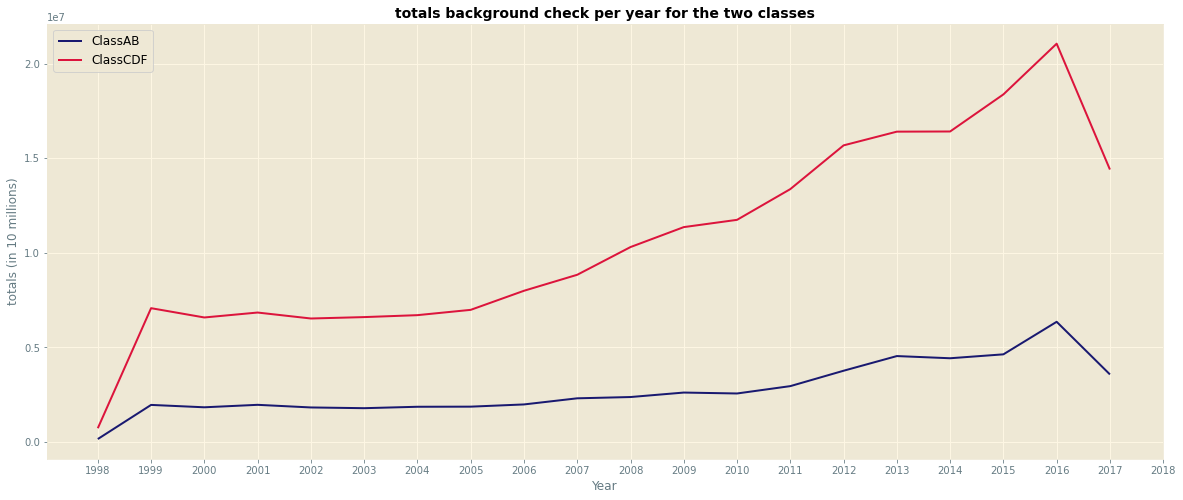

In [61]:
# Now we'll plot totals background check per year for the two classes
line_plot(ClassAB_totals,ClassCDF_totals,'totals background check per year for the two classes',True)
plt.show()

1. As we can see that both classes are continously on the rise as the data was first collected in November 1998 when the permanent provisions of the Brady Act went into effect and established the National instant Criminal Background check system (NICS) [1]
2. The total background checks in 2017 decreased as the data was collected till septamber 2017
3. We can observe a noticable surges in 2006, 2012, 2013 and 2016, We'll be now checking these surges by month to have a closer look. High gun sales surges maybe directly related to the mass tend to buy more firearms due to fear of gun restriction laws or fear of
lack of protection after a mass shooting incident, let's explore the purchasing trend while adding in the plot some of key incidents each year

The incidents dates That we'll be adding to the plots are the following:
1. september 2000: After the 11 september terrorist attacks some theorized that more guns where purchased for protection.
1. september 2005: Hurricane Katrina where police officers ''evacuated people from New Orleans after Hurricane Katrina, legally registered guns were confiscated from civilians. Conservatives responded by pushing for a federal law prohibiting the seizure of firearms from civilians during an emergency, and many states followed with similar legislation.'' [2]
2. December 2012: When president Obama called for new buying restrictions after the mass shooting at Sandy Hook Elementary School. [2]
3. May 2013: When Maryland approved one of the nation’s strictest gun-control measures in May 2013, gun sales jumped as buyers tried to beat the October deadline specified in the measure, which banned most semiautomatic rifles. [2]
4. December 2016: San Bernardino shooting and president Obama calling for more gun restriction laws. [3]


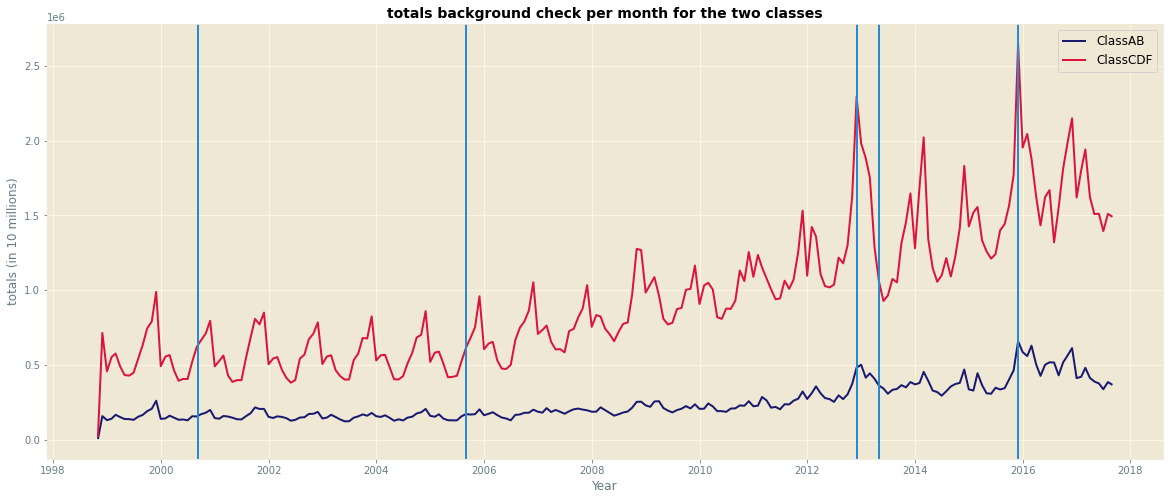

In [62]:
# Now we'll plot the totals background check per month for the two classes
line_plot(ClassAB_totals_monthly,ClassCDF_totals_monthly,'totals background check per month for the two classes',False)
# adding the above mentioned dates
plt.axvline(x=pd.to_datetime('2000-09-11'))
plt.axvline(x=pd.to_datetime('2005-09-01'))
plt.axvline(x=pd.to_datetime('2012-12-01'))
plt.axvline(x=pd.to_datetime('2013-05-01'))
plt.axvline(x=pd.to_datetime('2015-12-01'))
plt.show()


1. There is a clear pattern for gun sales each year as we can see at the end of each year maybe because more purchases tend to happen during the november black friday 
2. The highest peaks in gun purchases tend to favor the theory that more calls for gun restriction laws tend correlate with and maybe cause more gun sales. Also mass shootings maybe also the cause of these high peaks as they were the primarly cause for calling for the gun restictions.
3. Class A and B seems to have less steep surges but maybe it's because they represent only 11 states 

### Research Question 2: What are the highest Class(AB or CDF)/top 10 states in purchasing growth in each state Class ?

> We can examine what are the top 10 states with the most background checks

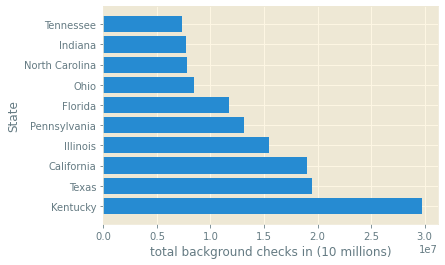

In [63]:
# Horizontal bar plot of states totals background checks throught the years given in the dataset [1998 to 2017]
plt.barh(growth_data.groupby('state')['totals'].sum().sort_values(ascending=False)[:10].index.values, growth_data.groupby('state')['totals'].sum().sort_values(ascending=False)[:10].values)
plt.xlabel('total background checks in (10 millions)')
plt.ylabel('State')
plt.show()

From the Class A and B states only 2 states are in the top 10 states: California and Illinois, it makes sense to theorize that the more gun restriction laws the less purchases people make, but bare in mind the population parameter as higher states population means more gun purchases

We'll now try to neutralize the population effect by plotting the total background checks per capita for the two classes to see if anything interesting comes up. As previously mentioned the population data used in this notebook are for years 2010-2019 and the FBI gun data are in the years interval of 1998-2017 So we'll just try to focus on the data available in both datasets in the interval of 2010-2017.

In [64]:
# mergin thr growth table with population data each year for every state
growth_data_for_standarization=growth_data.merge(yearly_population,left_on=['state','year'],right_on=['state','year'])
growth_data_for_standarization['gun_per_capita']=growth_data_for_standarization['totals'] / growth_data_for_standarization['population']


In [65]:
growth_data_for_standarization.head()

,state,month,permit,totals,totals_growth,year,population,gun_per_capita
0,Alabama,2010-01-01,397.0,24397.0,-73.0,2010,4785437.0,0.005098
1,Alabama,2010-02-01,408.0,30456.0,19.9,2010,4785437.0,0.006364
2,Alabama,2010-03-01,460.0,26403.0,-15.4,2010,4785437.0,0.005517
3,Alabama,2010-04-01,396.0,20791.0,-27.0,2010,4785437.0,0.004345
4,Alabama,2010-05-01,336.0,18752.0,-10.9,2010,4785437.0,0.003919


In [66]:
def total_per_capita_by_class(Class):
    '''This funtion is used to calculated the growth per year and capita for each class
    function argument is the list of states in a given class
    function output is a Series of gun per capita divided by the number of states in the given class'''
    # filtering by class
    growth_data= growth_data_for_standarization[growth_data_for_standarization['state'].isin(Class)].iloc[:,[0,3,5,7]]
    # calculating the count of each class
    count = growth_data['state'].unique().shape[0]
    # Calculating the totals per population and number of states in class
    growth_data['average_totals'] = growth_data['gun_per_capita'] / count
    totals_average=growth_data.groupby('year')['average_totals'].sum()

    #Note: the term 'standarization' is not meant to be the fimiliar standarization in statistics and ML, 
    # It's just dividing the total background checks for each class and dividing by their count and population
    return totals_average

In [67]:
total_per_capita_by_class(ClassAB_states).head()

year
2010    0.024563
2011    0.028188
2012    0.036572
2013    0.044233
2014    0.040146
Name: average_totals, dtype: float64

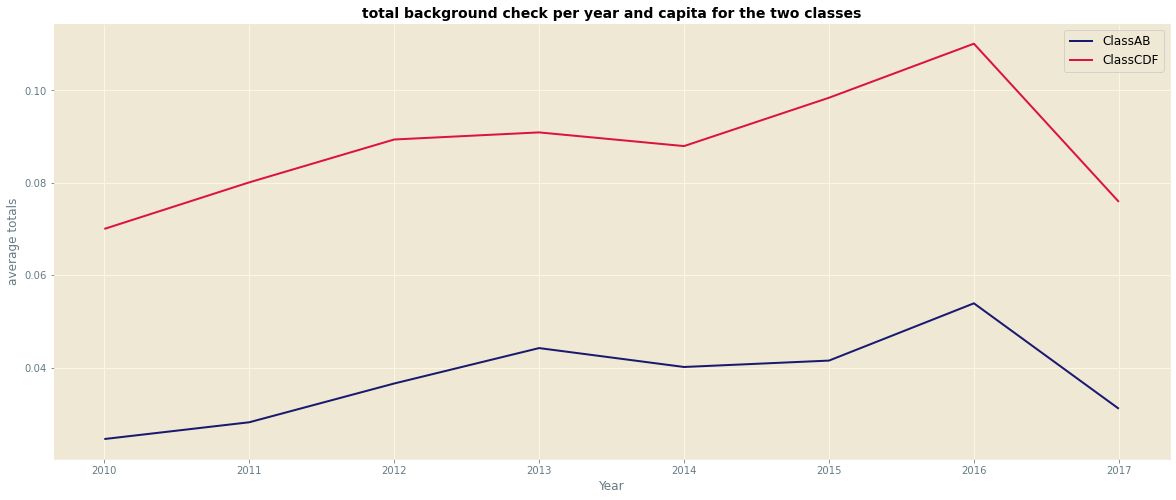

In [68]:
capita_AB = total_per_capita_by_class(ClassAB_states)
capita_CDF = total_per_capita_by_class(ClassCDF_states)

line_plot(capita_AB,capita_CDF,'total background check per year and capita for the two classes')
plt.ylabel('average totals')
plt.show()

the total background checks for the Class C,D and F are more than it's in Class A and B and the total background check per year and capita for the Class A and B are higher. The growth even seems to increase more that the growth increase in the AB states.
<br> But how about the top 10 states that witnessed the highest growth in gun sales between the years 2006 and 2016? as 2006 witnessed the begining of the gun purchases sales
* We'll be using now the yearly increase table we prepared in the cleaning section to plot these top 10 states

In [69]:
# I excluded the 1st row as it resembles the growth in Guam but we're only interested in states
top_10_states=state_totals_increase.sort_values(by='growth_10years', ascending=False).reset_index().iloc[1:11,:]


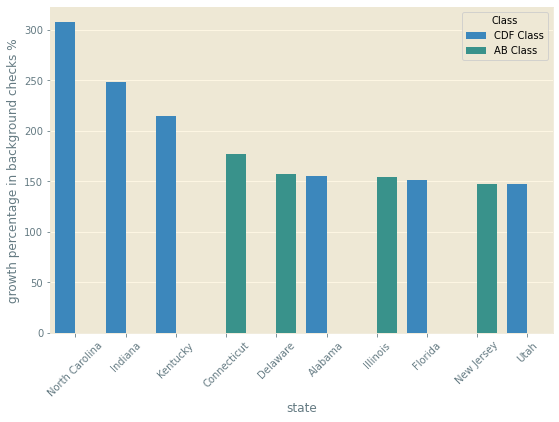

In [70]:
# We'll now draw a bar chart for the top 10 states in growth sales between the years 2006 and 2016
plt.figure(figsize = (9,6))
sns.barplot(data =top_10_states ,x ='state',y ='growth_10years', hue='Class')
plt.xticks(rotation=45)
plt.ylabel('growth percentage in background checks %')
plt.show()

* Although the Class AB states are only 11 states, 4 of them are in the top 10 states in background checks growth over 10 years!
North Carolina had the highest growth on gun sales (over 300% Increase)
* Percent increase may be higher if sales are already in low numbers, any increase in low numbers will result in high increase percent. So, Further investigation on this chart is needed before drawing any conclusions

### Research Question 3: What census data is most associated with high gun per capita?

We'll now investigate the Census data and how it's parameter correlates with the FBI background checks data, in the Data Cleaning section we split the Census data into 3 datasets representing the parameters in (2012, 2016 and the 2011-2015 interval) and we also extracted 3 datasets from the FBI gun data for these year to find the correlation in both datasets.

*1. The Census data and gun data correlations in 2012*

In [71]:
# Obtaining a merged dataset using the FBI_Census_merging function previously explained
gun_2012_merged=FBI_Census_merging(gun_data2012,census_data2012,population_data,2012)
# Obtaining a correlation table using the FBI_Census_correlations function previously explained
gun_2012_corr_table = FBI_Census_correlations(gun_2012_merged)

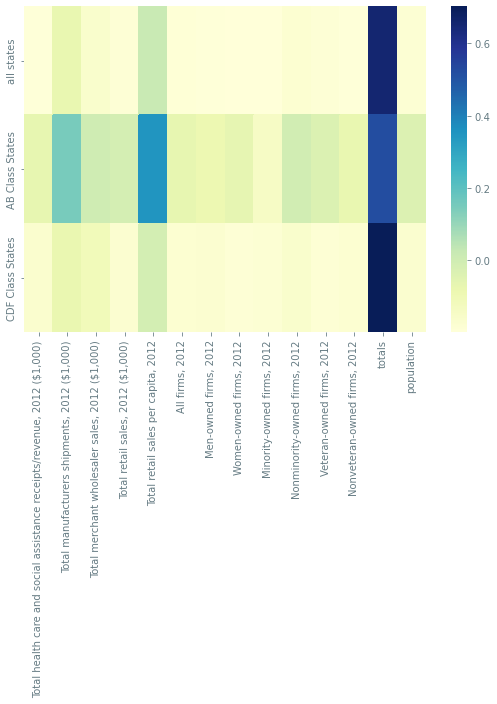

In [72]:
# plotting a heatmap of correlations from the correlations table obtained
plt.figure(figsize = (9,6))
sns.heatmap(gun_2012_corr_table, cmap="YlGnBu")
plt.show()

As we can see in the heatmap created there's weak or no correlation between the chosen parameters in year 2012 and the gun purchases, the only noticable correlation is the total retail sales per capita (which was 0.35 for The Ab classes and near zero for the CDF classes), Still a weak correlation but suggest that retail sales in the AB classes are following similar patterns for the gun purchases

We can also observe that the total background checks in the C, D and F states correlates stronger with gun per capita than it's in the A and B states as it's easier to buy firearms in these states so If the population in the A and B states increase it doesn't mean necessarily that gun purchases would increase in the same manner.

*2. The Census data and gun data correlations in 2016*

In [73]:
# Obtaining a merged dataset using the FBI_Census_merging function previously explained
gun_2016_merged = FBI_Census_merging(gun_data2016,census_data2016,population_data,2016)
# Obtaining a correlation table using the FBI_Census_correlations function previously explained
gun_2016_corr_table = FBI_Census_correlations(gun_2016_merged)

In [74]:
gun_2016_merged.head(1)

,state,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)",totals,population,gun_per_capita,Class
0,Alabama,4863300.0,0.06,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,2230185.0,616947,4863525.0,0.126852,CDF Class


In [75]:
gun_2016_corr_table

,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Housing units, July 1, 2016, (V2016)",totals,population
all states,-0.102869,0.053103,0.064010,-0.018327,-0.068657,0.223466,-0.095784,-0.008516,-0.216167,-0.119452,-0.135103,-0.212148,0.288878,-0.099666,0.686537,-0.102534
AB Class States,0.111029,0.051508,0.428095,-0.310513,-0.189364,0.411188,-0.068067,0.214479,-0.352855,-0.301583,-0.309250,0.078752,0.324597,0.122084,0.611247,0.113049
CDF Class States,-0.100088,-0.005335,-0.018076,-0.005690,0.004328,0.146637,-0.078673,-0.056787,-0.197134,-0.072758,-0.081162,-0.193661,0.232508,-0.097874,0.780881,-0.100043


In [76]:
def scatter_plot(data,list_of_columns):
    '''This function is used to plot a scatterplot as we'll be using it repeatively
    its input are the data output of the FBI_Census_merging function and a list of columns that we want to draw
    it plot a scatter plot with state classes colored '''
    for i in list_of_columns:
        title = data.columns[i]
        plt.figure(figsize = (9,6))
        col = np.where(data.iloc[:,-1] == 'CDF Class','k',np.where(data.iloc[:,-2] == 'AB Class','b','r'))
        plt.scatter(data.iloc[:,i],data.iloc[:,-2], c=col)
        plt.title('{} vs gun per capita'.format(title), fontsize=14,fontweight='bold')
        plt.ylabel('Gun per Capita')
        plt.xlabel('{}'.format(title))
        plt.show()

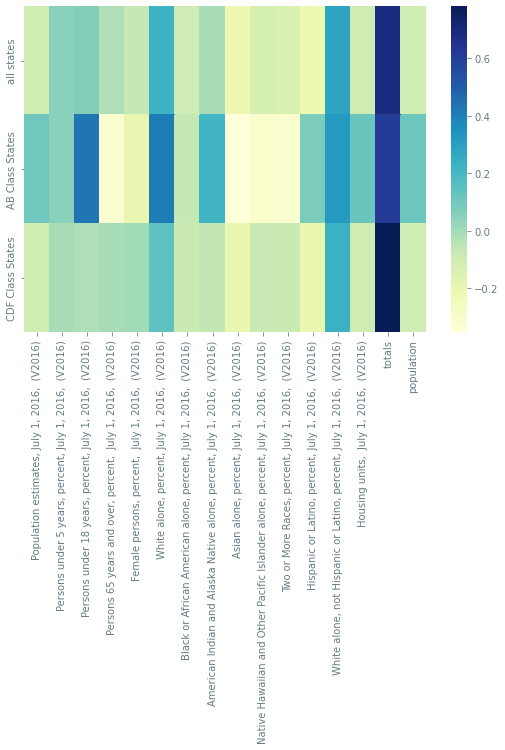

In [77]:
# plotting a heatmap of correlations from the correlations table obtained
plt.figure(figsize = (9,6))
sns.heatmap(gun_2016_corr_table, cmap="YlGnBu")
plt.show()

As we can see in the heatmap created there's weak or no correlation between the chosen parameters in year 2016, most noticable parameters are the following for the AB States:
1. Persons under 18 years, percent in A B States: 0.42
2. White Alone in AB states: 0.41
3. White Alone not Hispanic or latino: 0.32
3. Asian Alone in AB states: -0.35

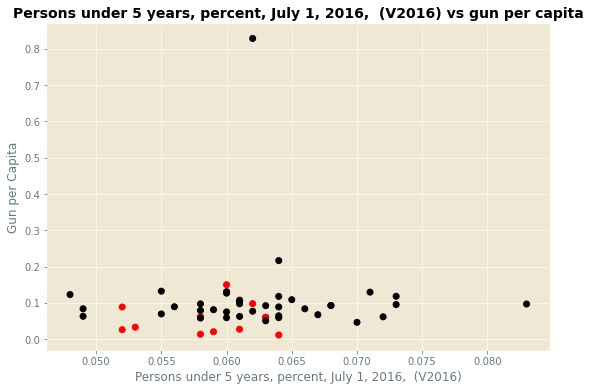

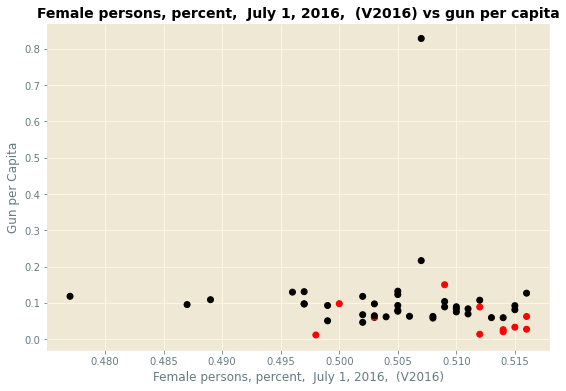

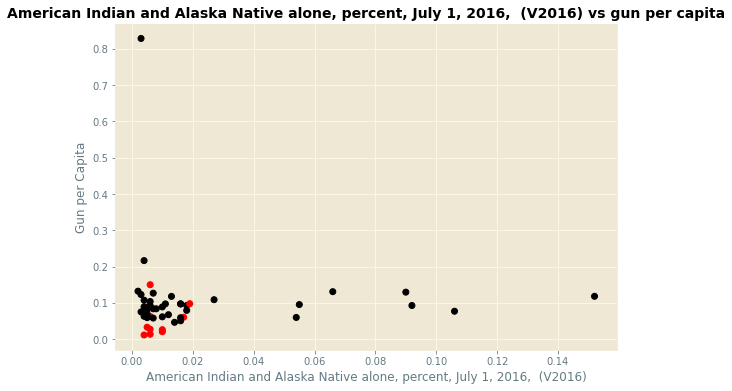

In [78]:
# Checking some of these variables
list_of_columns=[2,5,8]
scatter_plot(gun_2016_merged,list_of_columns)

* these correlations suggests that in the A B states white people are more likely to possess or try to purchase a gun and Asian people tends to favor not purchase firarms.
* The correlation of 18 years and younger percent may need further investigation as federal laws prohobit selling firearms to any person younger than 18, the dataset is limited to perform this further investigation for each state in each year to confirm this correlation.

Again, We can also observe that the total background checks in the C, D and F states correlates stronger with gun per capita than it's in the A and B states as it's easier to buy firearms in these states so If the population in the A and B states increase it doesn't mean necessarily that gun purchases would increase in the same manner.

*3. The Census data and gun data correlations in years interval from 2011 to 2015*

In [79]:
# Obtaining a merged dataset using the FBI_Census_merging function previously explained
gun_to2015_merged = FBI_Census_merging(gun_datato2015,census_datato2015,population_data,2015,True)
# Obtaining a correlation table using the FBI_Census_correlations function previously explained
gun_to2015_corr_table = FBI_Census_correlations(gun_to2015_merged)

In [80]:
gun_to2015_corr_table

,"Veterans, 2011-2015","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015",totals,median_to2015
all states,-0.163884,0.234266,-0.298163,-0.346542,-0.305502,-0.370012,-0.173900,-0.122928,-0.133016,-0.340754,-0.087401,-0.331665,0.395180,-0.026968,-0.171809,-0.183761,-0.259357,-0.275176,-0.284308,0.249463,-0.189917,-0.183558,-0.199501,0.075682,-0.184196,0.611192,-0.173816
AB Class States,0.088924,0.439720,-0.576905,-0.585608,-0.200589,-0.598152,0.018468,-0.329063,-0.351996,-0.265399,0.148391,-0.078371,0.199747,0.109028,0.161869,0.031853,-0.354873,-0.316634,-0.047223,0.074106,-0.008240,0.012181,-0.018231,0.388383,-0.029969,0.523742,0.004653
CDF Class States,-0.178165,0.100285,-0.098479,-0.183176,-0.196606,-0.232847,-0.163631,-0.017943,0.035413,-0.240512,-0.119139,-0.230699,0.317209,-0.198149,-0.145574,-0.151053,-0.094708,-0.118707,-0.156411,0.174591,-0.178649,-0.170810,-0.177843,0.012171,-0.171159,0.671312,-0.162539


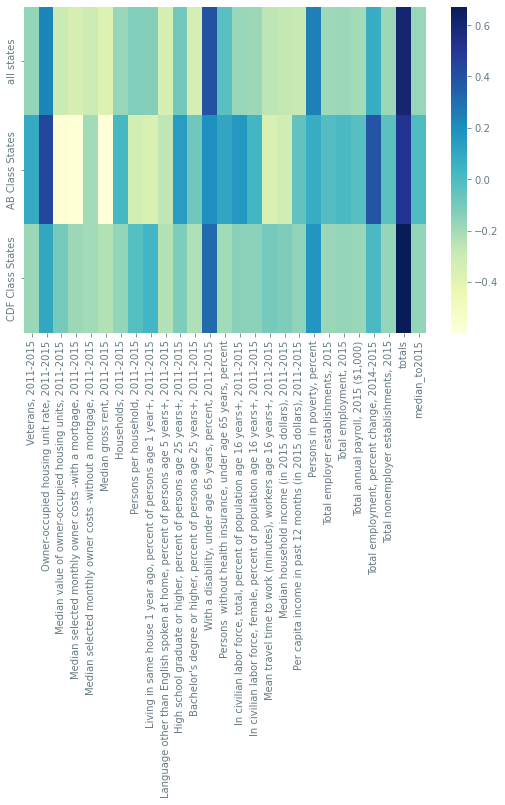

In [81]:
# plotting a heatmap of correlations from the correlations table obtained
plt.figure(figsize = (9,6))
sns.heatmap(gun_to2015_corr_table, cmap="YlGnBu")
plt.show()

As we can see in the heatmap created there's weak or no correlation between most of the chosen parameters in years interval of 2011-2015, most noticable parameters are the following:
> *AB States*:
1. Owner-occupied housing unit rate in A B States: 0.44
2. Median value of owner occupied housing units in AB states: - 0.58
3. Median gross rent in AB states: -0.6
3. Living in the same house 1 year ago in AB states: -0.35
4. Mean travel time to work in AB states: -0.35
5. Total employment, percent change: 0.38
> *All States*:
1. Median gross rent: -0.37
2. Language other than English spoken at home: -0.34
3. Bachelor's degree or higher, percent of persons age 25 years+: -0.33
4. With a disability, under age 65 years, percent: 0.39

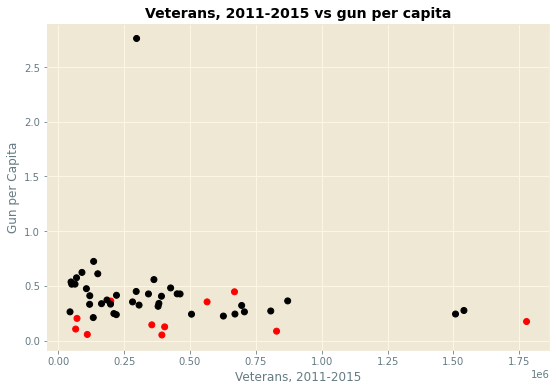

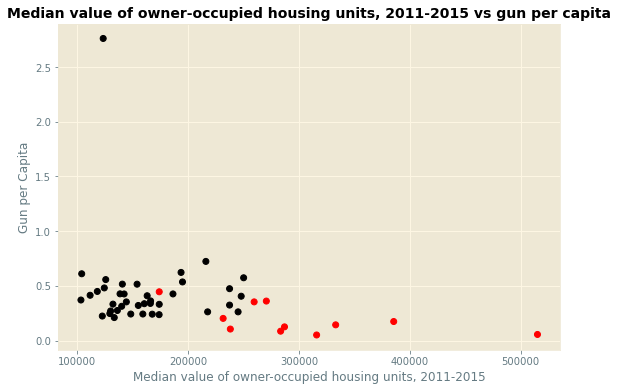

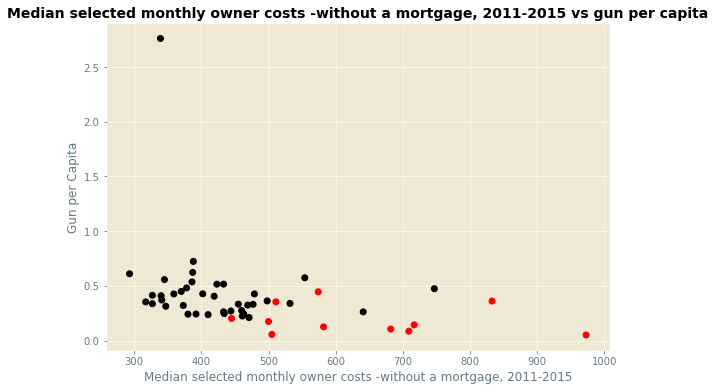

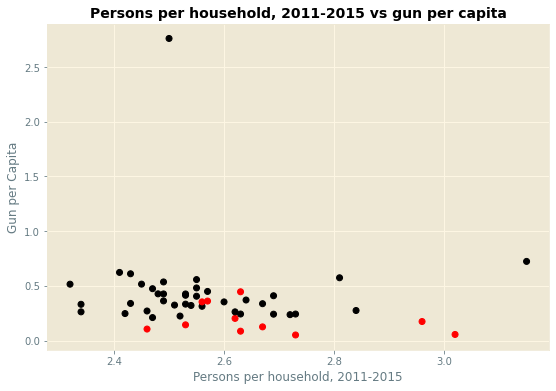

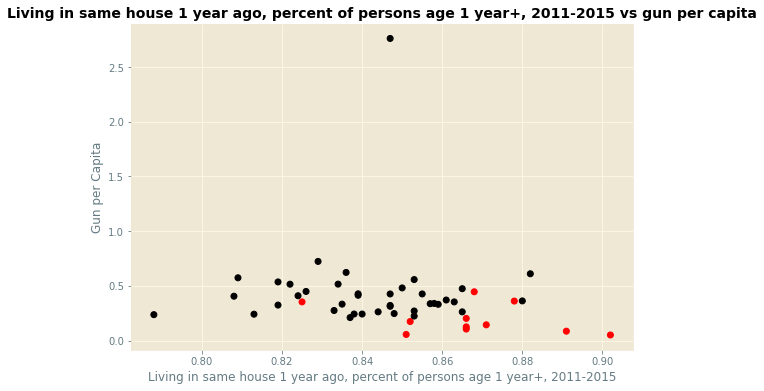

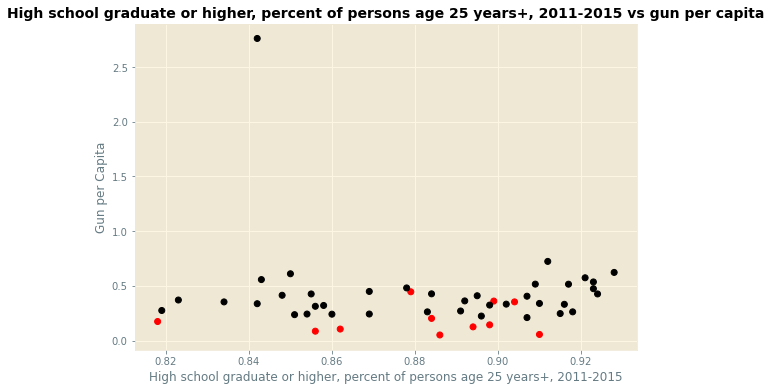

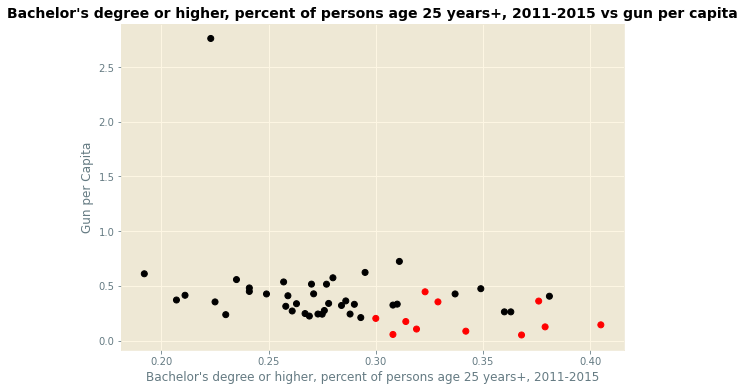

In [82]:
# Checking some of these variables
list_of_columns=[1,3,5,8,9,11,12]
scatter_plot(gun_to2015_merged,list_of_columns)

> *AB States*:
* these correlations suggest that in the A B states higher people live in Owner-occupied houses are more likely to possess or try to purchase a gun for protection and as their income increase (hence, they live in a higher value housing unit) they're less likely to try to possess a gun for the purpose of protection purposses as rich neoghborhoods tends to be more safe.
* Further investigation maybe needed to check the correlation of travel time to work and total employment, keeping in mind that the correlation calculations for the AB states are limited by the availability of only 11 data points (number of states) and these correlation kind of contradict the correlation of total employment in the AB states (0.012).
> *All States*:
* The correlation of gross rent and bachelor's degree or higher may also suggest that people with higher than average income are less likely to possess firearms 
* the high correlation between gun sales and people with disability suggest that they're more likely to try to possess firearms for protection. the dataset unfortunately doesn't detail the types of disabilities counted as some like mental illness can prohibit from owning a gun.

### Research Question 4: Is there is a correlation between gun purchases and the number of gun-related US homicides? How is gun restriction laws affecting the US homicides?

We'll now investigate the US Homicides data and how it correlates with the FBI background checks data, in the Data Cleaning section we extracted from te US Homicides data the counts of homicides in all states that envolved a firearm between the years 2010-2014.
We also merged these dataset with the FBI data from 2010 to 2014 and the population data from 2010 to 2014 and calculated guns per capita for each state each year. We'll now check to see the correlations between guns per capita and numbers of gun-related homicides fo each State class (Class AB and Class CDF)

In [83]:
# Checking the homicide dataset after cleaning
gun_homicide_merged.head()

,state,year,totals,Weapon,population,gun_per_capita
0,Alabama,2010,308607.0,191,4785437.0,0.064489
1,Alabama,2012,431356.0,2,4815588.0,0.089575
2,Alabama,2013,563880.0,2,4830081.0,0.116743
3,Alabama,2014,621305.0,1,4841799.0,0.128321
4,Alaska,2010,65909.0,43,713910.0,0.092321


In [84]:
count=0
for i in gun_homicide_merged['state'].unique():
    '''this for loop is created to create a dataframe that contains totals and gun per capita correlation with each state
    it loops through each state to calculate its correlations then vertically stack them one after the other'''

    if count == 0:
        # First iteration as count = 0 
        corr_data = np.array(gun_homicide_merged[gun_homicide_merged['state']==i].corr().loc['Weapon',['totals','gun_per_capita']])
        count+=1
    else:    
        # any other iteration, it begins with vertically stacking on the first one
        corr_data = np.vstack([corr_data, np.array(gun_homicide_merged[gun_homicide_merged['state']==i].corr().loc['Weapon',['totals','gun_per_capita']])])
        count+=1
# Converting the created corr_data numpy array into a dataframe
state_correlations=pd.DataFrame(corr_data, columns=['totals_correlarion','GPC_correlation'],index=gun_homicide_merged['state'].unique())   
state_correlations = state_correlations.reset_index().rename(columns={'index':'state'})

In [85]:
state_correlations.set_index('state', inplace=True)

In [86]:
state_correlations.head()

,totals_correlarion,GPC_correlation
state,,
Alabama,-0.824783,-0.825064
Alaska,0.324042,0.320027
Arizona,-0.385183,-0.338131
Arkansas,0.447840,0.435175
California,-0.363522,-0.355671


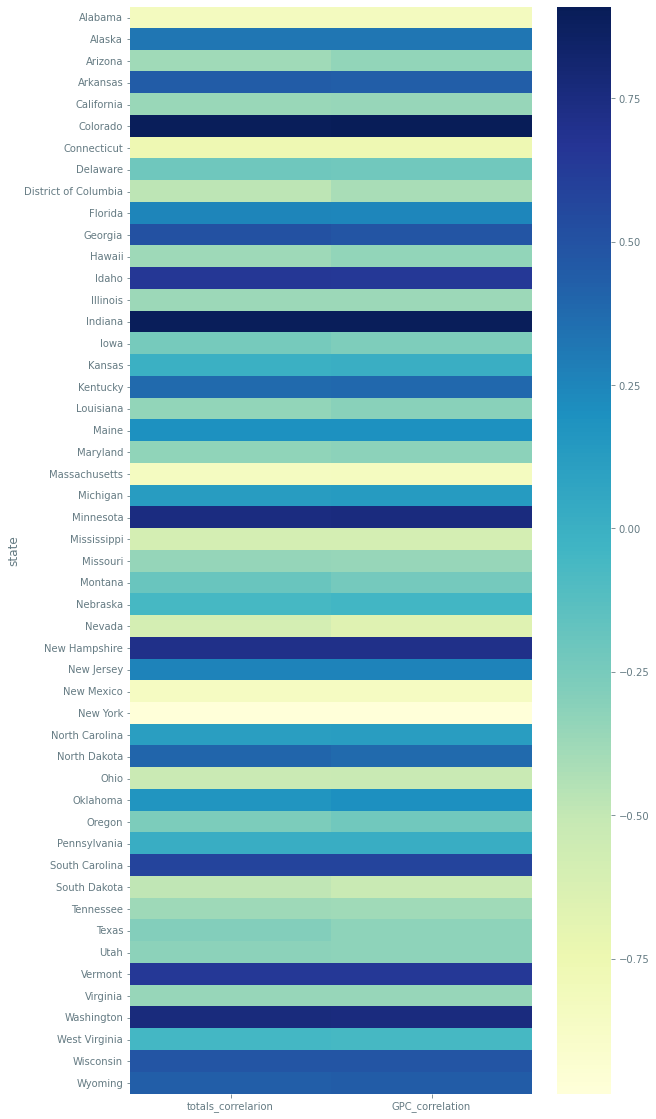

In [87]:
# Creating heatmap of the state_correlations table
plt.figure(figsize = (9,20))
sns.heatmap(state_correlations, cmap="YlGnBu")
plt.show()

As we can observe that the Class AB States mostly correlate negatively or at least with weak positive correlation with gun per capita (e.g.: New york, Massachusetts, Connecticut, California, New Jersey) While in the CDF Class it's observed that many states correlates positively (e.g.: New Hampshire, vermont, south carolina, minnesota, indiana, colorado, etc.)

**We can check the gun-related homicides against gun per capita for each class to have a closer look**

In [88]:
state_correlations.reset_index(inplace=True)
# Creating a Class column to used it as coloring parameter
gun_homicide_merged['Class']=np.where(gun_homicide_merged['state'].isin(ClassAB_states),'AB Class','CDF Class')

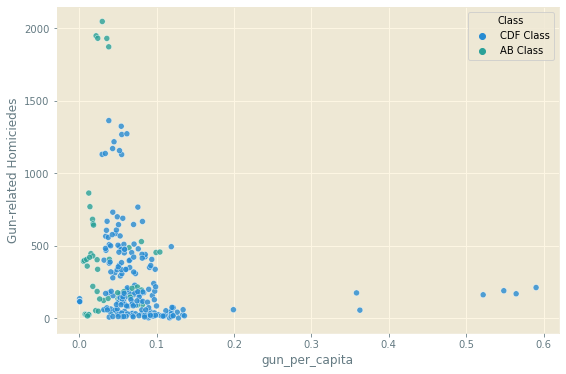

In [89]:
# Creating a scatter plot to check on the correlations 
plt.figure(figsize=(9,6))
sns.scatterplot(x = gun_homicide_merged['gun_per_capita'],y = gun_homicide_merged['Weapon'], hue=gun_homicide_merged['Class'], alpha=0.8)
plt.ylabel('Gun-related Homiciedes')
plt.show()

for the AB classes as we can see the more gun per capita the less gun-related homicides commited, this suggest that the people purchasing the guns went through a strict process (permits, gun registerations, permits renewal every year) and are less likely to commit gun-related homicides.

> it's worth mentioning that some AB class states may have a low gun checks per capita but there is a high number of gun-related homicides, it's suggested that these states are neighbors to a less restrict states that people purchase their gun from and commit the violent crimes in their gun laws strict states and as purchasing sales surges more people in these states own firearms that can participate in increasing the number of gun-related homicides

The CDF Classes however shows a pattern of positive correlation except for few outliers, it shows again that this class may need further segmentation for a detailed analysis per each class

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.
> In this project I tried to investigate the FBI Background checks data and The Census data of the US states in the years 2012, 2016 and in the years interval of 2011-2015. in order to make more sense of these data I also used two addition dataset:
1. The Census population data in years 2010-2019
2. The US homicides data found on kaggle 
> The questions that i was interested in was as follows:
1. What are the firearm purchasing trends, what is the overall trend and what drives the gun purchases to surge?
2. What are the Census data most associated with gun per capita?
3. How the gun purchases correlates with the number of gun-related homicides in the US?
> I decided to split the A/M data based on law strictness in each state and used the law strictness metric found in giffords.org to split the data into 2 classes (Class A and B) and (Class C, D and F) to observe the gun-laws effect on each outcome

**Results:**
> *Overall trends*
1. the overall trend of gun purchasing is increasing with high surges near each of every year
2. high surges every year maybe because of the black fridays in november and discounts at the end of each year
3. there's an interesting pattern of sales surges after mass shootings, terrorist attacks and after respective politicians call for more gun-restrictions law 
4. States in Class A and B growth rates seems to be higher than growth rates of other states, cementing the idea that more people may try to purchase firearms in the fear that sooner they won't be able to.
>*Census data and FBI background checks*
* In the US states (Mostly in AB states) the most noticable data that seem to correlate with gun purchasing are the following:
1. people with higher education correlate negatively with gun purchasing
2. people with disability correlate positively with gun purchasing
3. White race are the highest positive correlation with gun purchasing whereas asian people are negatively correlating.
4. there's a strong correlation between owning a house and buying firearms which ofcourse people use to protect their properties but also as the house value or rent goes up there's a negative correlation which suggest that people living in urban high income areas maybe less likely to purchase firearms for protection, this is also true for people with higher degree as they tend to earn more.
5. The states that is classified in the C,D and F classes have weak or no correlation with most of the Census data suggesting that either they truely don't have a relationship with the census data or the 3 classes needs further more segmentation and investigation.
> *US gun-related homicides and FBI background checks*
1. Most of the States in class A and B gun purchases per capitacorrelates negatively with the gun-related homicides while the States in class C, D and F strongly correlate in a positive manner with gun purchases per capita

**Limitations:**
1. Correlation doesn't imply causation: may variables that correlates positively or negatively aren't the cause for increasing the FBI background checks data they just follow a similar/opposite pattern, they may cause or be caused by gun purchases or may be the product of another variable that are causing them to correlate with the gun purchasing trends (e.g: The sales trends each year caused by different factors and effecting the whole sales market)
2. The FBI background checks data isn't precisely the firearm purchases: "The agency stresses that you can't draw a one-to-one correspondence between "background checks" and "gun sales." The numbers include background checks for gun permits, too, which may or may not be accompanied by a sale. Different states have different procedures in place for running permit checks. Some unknown but likely significant percentage of gun transactions don't involve a federally licensed dealer and hence aren't accompanied by a background check at all."[3]
3. Census data is inconsistent: The Census data provided contained alot of variables but in different years (2010, 2012, 2016 and year intervals of 2011-2015 with median values) which makes it hard to calculate how each variable correlate with gun purchases. Also, one data point for each state in each year is insufficient to draw certain conclusions of how each change in variable per month or year effects the gun puchases.
4. population data: the population data used was between 2010 and 2019 which made it unlikely to track back gun per capita growth over 2 decades 1998-2017
5. There's is no fixed value for a correlation to safely theorize how a certain variable weights, i simply pointed out the higher correlations' values and made the assumption that these variables correlation values maybe enough to be counted as important

**References**
1. 'Background Checks for firearm transfers, 2015 - Statistical Tables', US department of justice
* Link: https://bjs.ojp.gov/content/pub/pdf/bcft15st.pdf
2. 'Happens After Calls for New Gun Restrictions? Sales Go Up', newyorktimes, By GREGOR AISCH and JOSH KELLER UPDATED June 13, 2016.
* Link: https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html
3. 'Gun sales hit new record ahead of new Obama gun restrictions' the washingtonpost, By Christopher Ingraham
* Link: https://www.washingtonpost.com/news/wonk/wp/2016/01/05/gun-sales-hit-new-record-ahead-of-new-obama-gun-restrictions/?fbclid=IwAR1mB6Oj05PjtbFw05QeN9ZaJg_IP4Sv0-6jnKWP9f3JoF21HmCTLODdFIo

